# Load Libraries and Datasets

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns

In [2]:
font = {'family': 'Helvetica',
        'color':  'black',
        'weight': 'normal',
        'size': 14}
plt.style.use('seaborn-darkgrid')

In [3]:
url = 'data/tfresults02.csv'
raw_data = pd.read_csv(url, error_bad_lines=False)
raw_data.head()

,Year,Event,Division,Gender,School,Name,Position,Timing(s)
0,2002,100 Metres,A,Boys,RJC,Benjamin Ang Fu Hong,1,11.14
1,2002,100 Metres,A,Boys,VJC,Teng Wei Yang Alexander,2,11.32
2,2002,100 Metres,A,Boys,RJC,Lee Weijie,3,11.49
3,2002,100 Metres,A,Boys,AJC,Tay Chi Wai Dennis,4,11.55
4,2002,100 Metres,A,Boys,NJC,Fong Zhi Guang,5,11.57


# How the Values Compare to Each Other

## Among Categories

### Column Chart

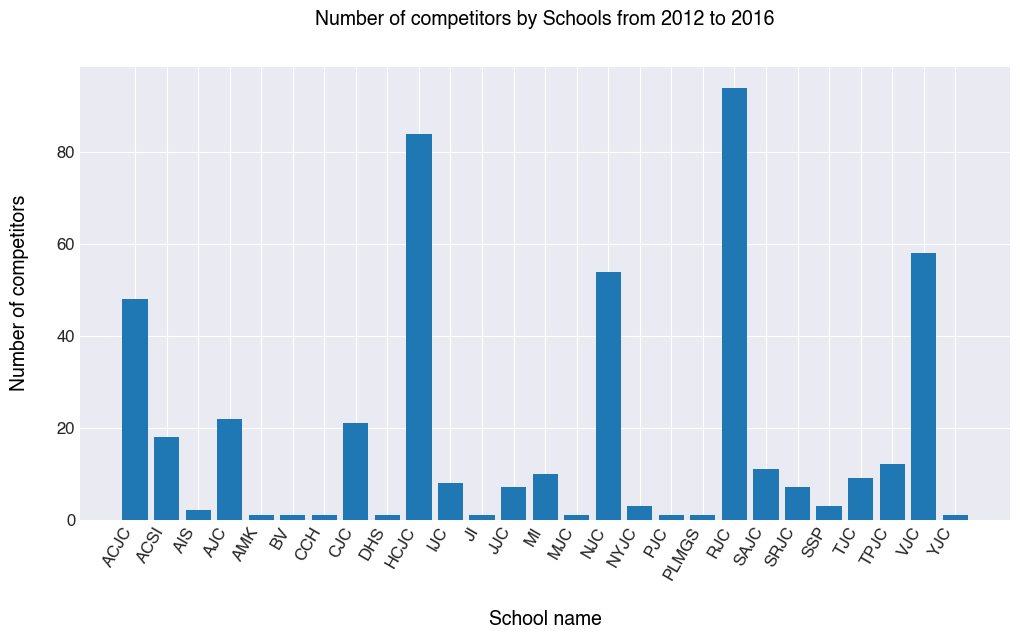

In [4]:
# Prepare Data
df = raw_data.groupby('School').size().reset_index(name='counts')
random.seed(100)

# Plot Bars
plt.figure(figsize=(12,6), dpi= 100)
plt.bar(df['School'], df['counts'], width=0.8)

# Add and style labels
plt.title(label='Number of competitors by Schools from 2012 to 2016', fontdict=font, loc='center', pad=30)
plt.xticks(fontsize=12, fontname='Helvetica', rotation=60, horizontalalignment= 'right')
plt.yticks(fontsize=12, fontname='Helvetica')
plt.xlabel('School name', fontdict=font, labelpad = 20)
plt.ylabel('Number of competitors', fontdict=font, labelpad = 20)

# Show plot
plt.show()

### Grouped Column

In [5]:
#Function to get number of runners per school by gender
def get_boys_girls():
    boys = []
    girls = []

    df = raw_data.groupby(['School', 'Gender']).size().reset_index(name='counts')
    
    labels = np.unique(raw_data['School'])
    for school in labels:
        value = df[(df['School'] == school) & (df['Gender'] == 'Boys')]['counts'].values
        if len(value) == 0:
            boys.append(0)
        else:
            boys.append(value[0])

    for school in labels:
        value = df[(df['School'] == school) & (df['Gender'] == 'Girls')]['counts'].values
        if len(value) == 0:
            girls.append(0)
        else:
            girls.append(value[0])
    
    return boys, girls

labels = np.array(df['School'])
gender_labels = np.unique(raw_data['Gender'])

boys, girls = get_boys_girls()

# print(labels)
# print(boys)
# print(girls)

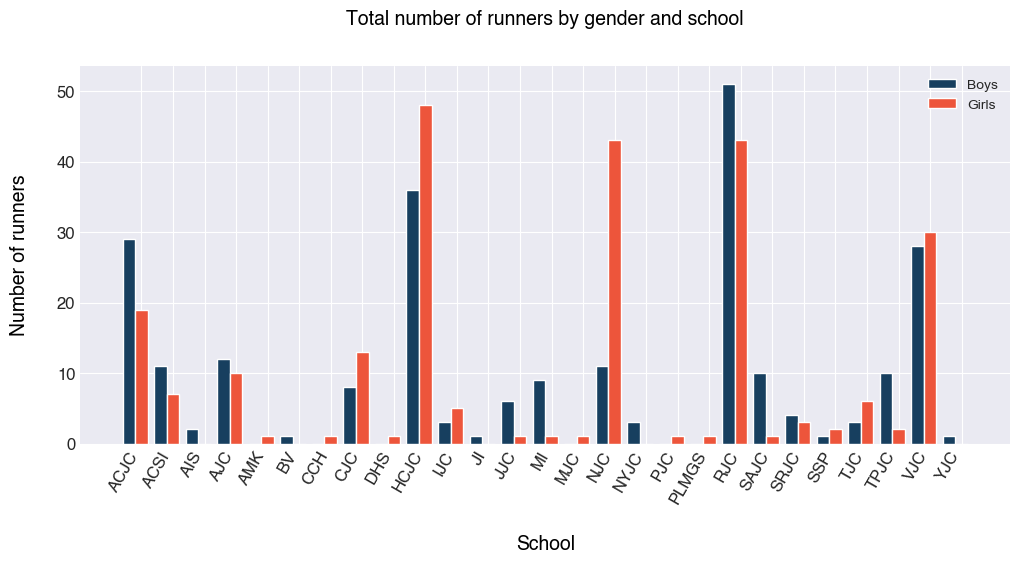

In [6]:
plt.figure(figsize=(12,5), dpi= 100)

# Set width of bar
barWidth = 0.4
 
# Set position of bar on X axis
r1 = np.arange(len(boys))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, boys, color='#173f5f', width=barWidth, edgecolor='white', label='Boys')
plt.bar(r2, girls, color='#ed553b', width=barWidth, edgecolor='white', label='Girls')
 
# Add xticks on the middle of the group bars
plt.title(label='Total number of runners by gender and school', fontdict=font, loc='center', pad=30)
plt.xticks([r + barWidth for r in range(len(boys))], labels, fontsize=12, fontname='Helvetica', rotation=60, horizontalalignment= 'right')
plt.yticks(fontsize=12, fontname='Helvetica')
plt.xlabel('School', fontdict=font, labelpad = 20)
plt.ylabel('Number of runners', fontdict=font, labelpad = 20)
plt.legend()

# Show plot
plt.show()

### Bar Chart

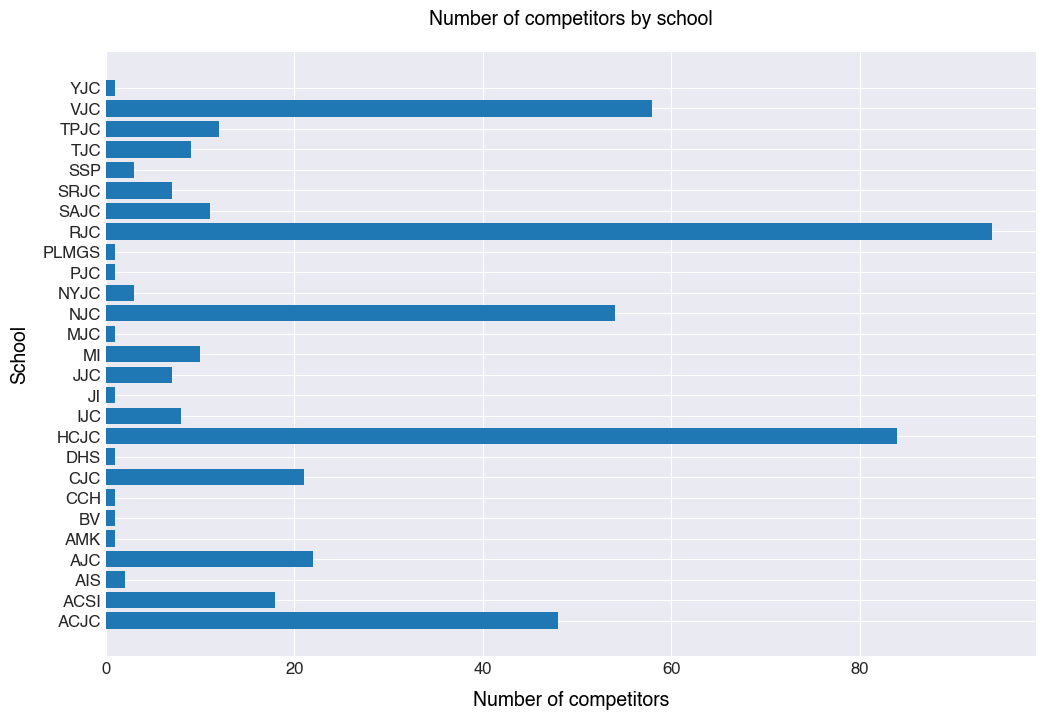

In [7]:
plt.figure(figsize=(12,8), dpi= 100)

height = df['counts']
school_names = df['School']
y_pos = np.arange(len(school_names))
 
# Create horizontal bars
plt.barh(y_pos, height)

# Decorations
plt.title(label='Number of competitors by school', fontdict=font, loc='center', pad=20)
plt.yticks(y_pos, school_names, fontsize=12, fontname='Helvetica')
plt.xticks(fontsize=12, fontname='Helvetica')
plt.xlabel('Number of competitors', fontdict=font, labelpad = 10)
plt.ylabel('School', fontdict=font, labelpad = 10)

# Show plot
plt.show()

## Over time

### Line Chart

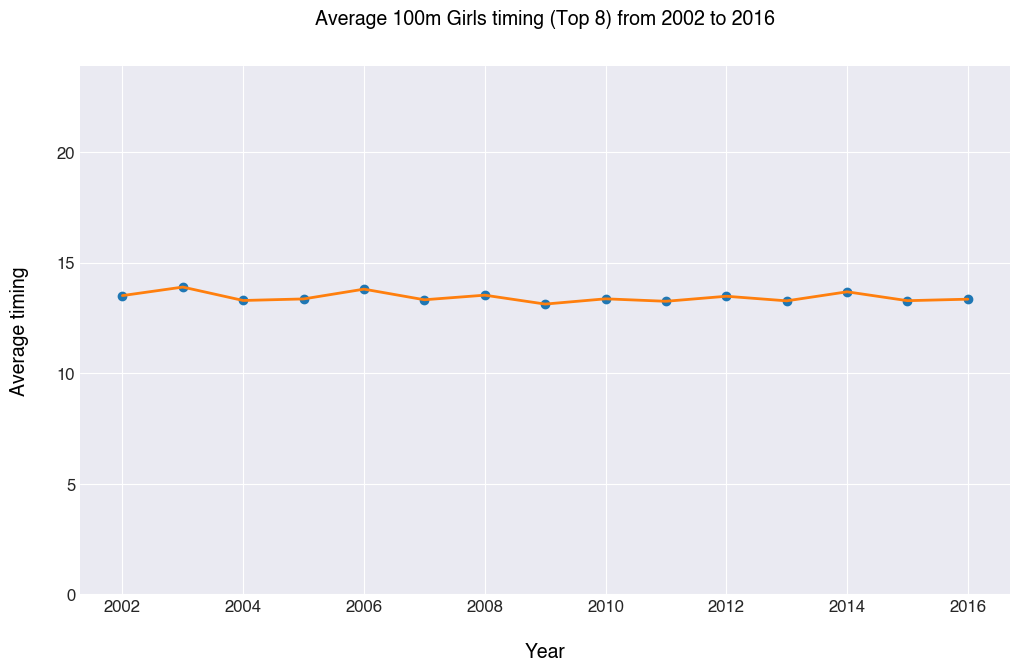

In [8]:
plt.figure(figsize=(12,7), dpi= 100)

# Prepare Data
girls_100m = pd.DataFrame(raw_data[(raw_data['Event'] == '100 Metres ') & (raw_data['Gender'] == 'Girls')].groupby(['Year'])['Timing(s)'].mean()).reset_index()
years = np.array(girls_100m['Year'])
girls_100m_mean_timings = np.array(girls_100m['Timing(s)'])

# Plot
plt.plot(years, girls_100m_mean_timings, 'o')
plt.plot(years, girls_100m_mean_timings, lw=2) 

# Set y axis to start from 0
plt.ylim(ymin=0, ymax = max(girls_100m_mean_timings) + 10)

# Decorations
plt.title(label='Average 100m Girls timing (Top 8) from 2002 to 2016', fontdict=font, loc='center', pad=30)
plt.yticks(fontsize=12, fontname='Helvetica')
plt.xticks(fontsize=12, fontname='Helvetica')
plt.xlabel('Year', fontdict=font, labelpad = 20)
plt.ylabel('Average timing', fontdict=font, labelpad = 20)

# Show plot
plt.show()

### Small multiples for line chart

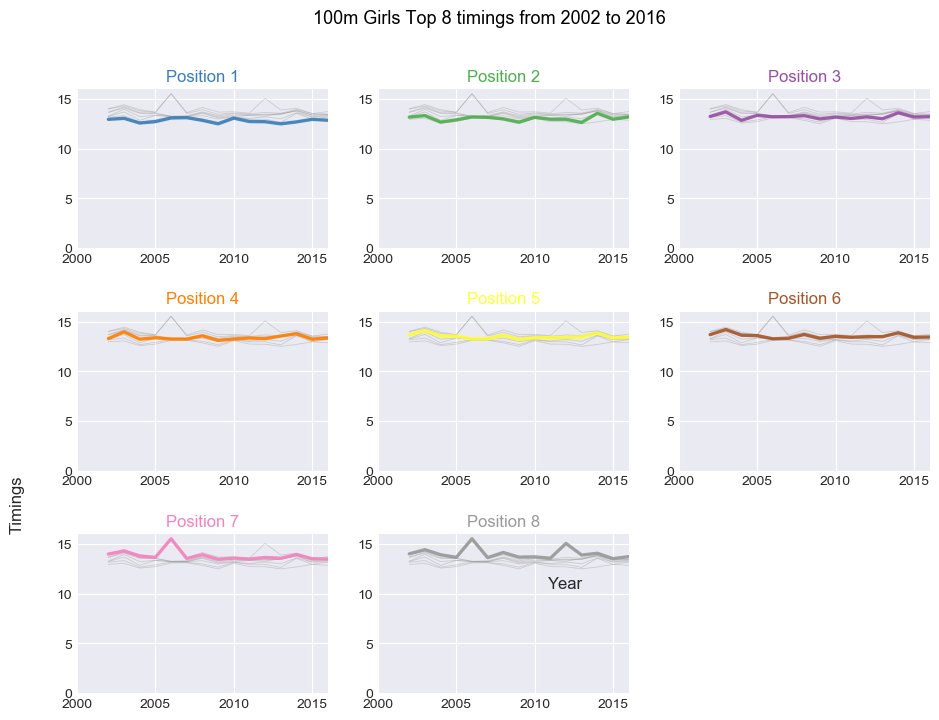

In [9]:
plt.figure(figsize=(11,8), dpi= 100)

# Get timings of 100m girls per year by position
list_girls_100m = []
for i in range(1, 9):
    list_girls_100m.append(
        np.array(raw_data[
            (raw_data['Event'] == '100 Metres ') & (raw_data['Gender'] == 'Girls') & (raw_data['Position'] == i)
        ]['Timing(s)']))

# Prepare data to plot - x, Position 1, Position 2 ...
data = {
    'x': years,
}
for i in range(len(list_girls_100m)):
    data['Position '+str(i+1)] = list_girls_100m[i]
df=pd.DataFrame(data)
 
# Create a color palette
palette = plt.get_cmap('Set1')
 
# Multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # Plot every groups, but discreet
    for v in df.drop('x', axis=1):
        plt.plot(df['x'], df[v], color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(df['x'], df[column], color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 
    # Same limits for everybody!
    plt.xlim(2000,2016)
    plt.ylim(0,16)
 
    # Add title for subplots
    plt.title(column, loc='center', fontsize=12, fontweight=0, color=palette(num) )

# Decorations
plt.subplots_adjust(hspace = 0.4)
plt.suptitle("100m Girls Top 8 timings from 2002 to 2016", fontsize=13, fontweight=0, color='black') # General title
plt.text(2012, 11, 'Year', ha='center', va='center', fontsize=12) # X-Axis
plt.text(1977, 19, 'Timings', ha='center', va='center', rotation='vertical', fontsize=12) # Y-Axis

# Show plot
plt.show()

# How the Data is Distributed

### Box Plot

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


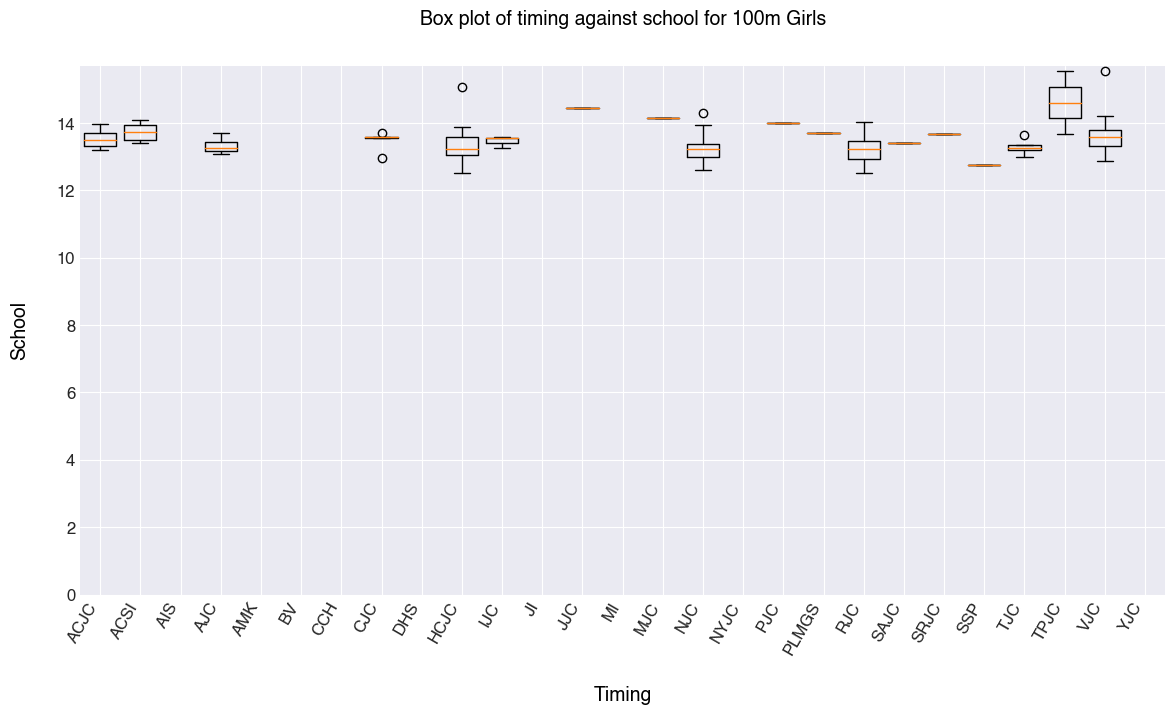

In [10]:
plt.figure(figsize=(14,7), dpi= 100)

# Prepare Data
girls_100m_data = raw_data[(raw_data['Event'] == '100 Metres ') & 
                           (raw_data['Gender'] == 'Girls')]
girls_100m_timings = []
for school in school_names:
    girls_100m_timings.append(
        np.array(girls_100m_data[raw_data['School'] == school]['Timing(s)'])
    )

# Draw Plot
plt.boxplot(girls_100m_timings, labels=school_names, widths = 0.8)

# Decorations
plt.title(label='Box plot of timing against school for 100m Girls', fontdict=font, loc='center', pad=30)
plt.yticks(fontsize=12, fontname='Helvetica')
plt.xticks(fontsize=12, fontname='Helvetica', rotation=60, horizontalalignment= 'right')
plt.xlabel('Timing', fontdict=font, labelpad = 20)
plt.ylabel('School', fontdict=font, labelpad = 20)

# Set y axis to start from 0
plt.ylim(ymin=0)

# Show plot
plt.show()

### Column Historgram

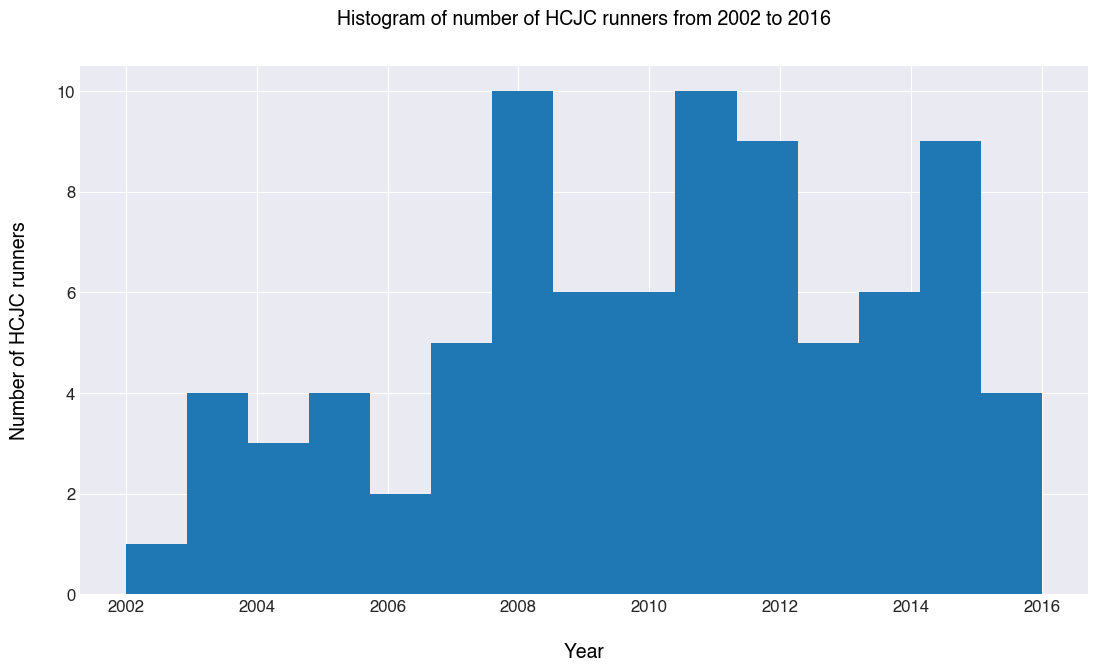

In [11]:
plt.figure(figsize=(13,7), dpi= 100)

# Prepare data
HCJC_runners = raw_data[(raw_data['School'] == 'HCJC')]
counts = np.array(HCJC_runners.groupby('Year')['Name'].count())

# Plot histogram
plt.hist(years, bins=len(years), weights=counts)

# Decorations
plt.title(label='Histogram of number of HCJC runners from 2002 to 2016', fontdict=font, loc='center', pad=30)
plt.yticks(fontsize=12, fontname='Helvetica')
plt.xticks(fontsize=12, fontname='Helvetica')
plt.xlabel('Year', fontdict=font, labelpad = 20)
plt.ylabel('Number of HCJC runners', fontdict=font, labelpad = 20)

# Show plot
plt.show()

### Scatter Plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


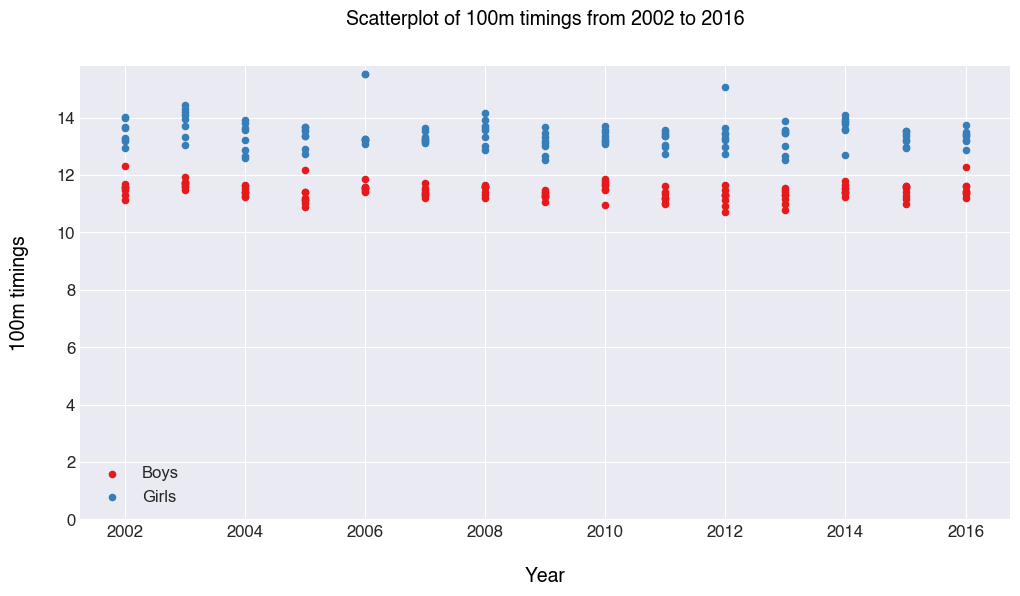

In [12]:
plt.figure(figsize=(12,6), dpi= 100)

# Create a color palette
palette = plt.get_cmap('Set1')

# Prepare data
both_genders_100m = raw_data[raw_data['Event'] == '100 Metres ']

# Plot scatter plot
for i, gender in enumerate(gender_labels):
    plt.scatter('Year', 'Timing(s)', 
                data=both_genders_100m.loc[both_genders_100m.Gender==gender, :], 
                s=20, c=palette(i), label=str(gender))

# Decorations
plt.title(label='Scatterplot of 100m timings from 2002 to 2016', fontdict=font, loc='center', pad=30)
plt.yticks(fontsize=12, fontname='Helvetica')
plt.xticks(fontsize=12, fontname='Helvetica')
plt.xlabel('Year', fontdict=font, labelpad = 20)
plt.ylabel('100m timings', fontdict=font, labelpad = 20)
plt.legend(fontsize=12)    

# Set y axis to start from 0
plt.ylim(ymin=0)

# Show plot
plt.show() 

# How the Data is Composed

## Two Dimensions

### Stacked Percent

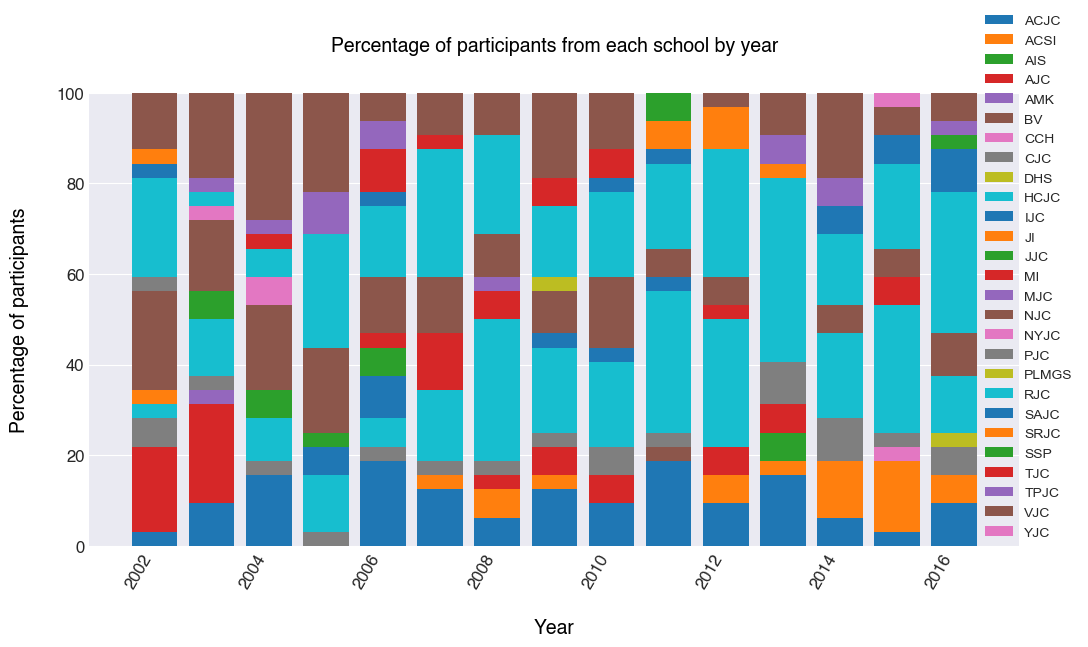

In [13]:
plt.figure(figsize=(12,6), dpi= 100)

# Prepare data
num_of_runners_each_year = 32

results = {}
for school in school_names:
    list_school_runner_counts = [raw_data[(raw_data['School'] == school) & (raw_data['Year'] == year)]['Name'].count()/32*100 for year in years]
    results[school] = list_school_runner_counts
    
def find_sum(a, b):
    return [a[j] + b[j] for j in range(len(a))]

intermediate_sum = []
for i in range(len(school_names)):    
    if i <= 0:
        intermediate_sum = results.get(school_names[i])
        plt.bar(years, results.get(school_names[i]))
    else:
        plt.bar(years, results.get(school_names[i]), bottom=intermediate_sum)
        intermediate_sum = find_sum(results.get(school_names[i]), intermediate_sum)

# Decorations
plt.title(label='Percentage of participants from each school by year', fontdict=font, loc='center', pad=30)
plt.yticks(fontsize=12, fontname='Helvetica')
plt.xticks(fontsize=12, fontname='Helvetica', rotation=60, horizontalalignment= 'right')
plt.xlabel('Year', fontdict=font, labelpad = 20)
plt.ylabel('Percentage of participants', fontdict=font, labelpad = 20)
plt.legend(school_names, bbox_to_anchor = [0.95, 1.2])

# Show plot
plt.show()

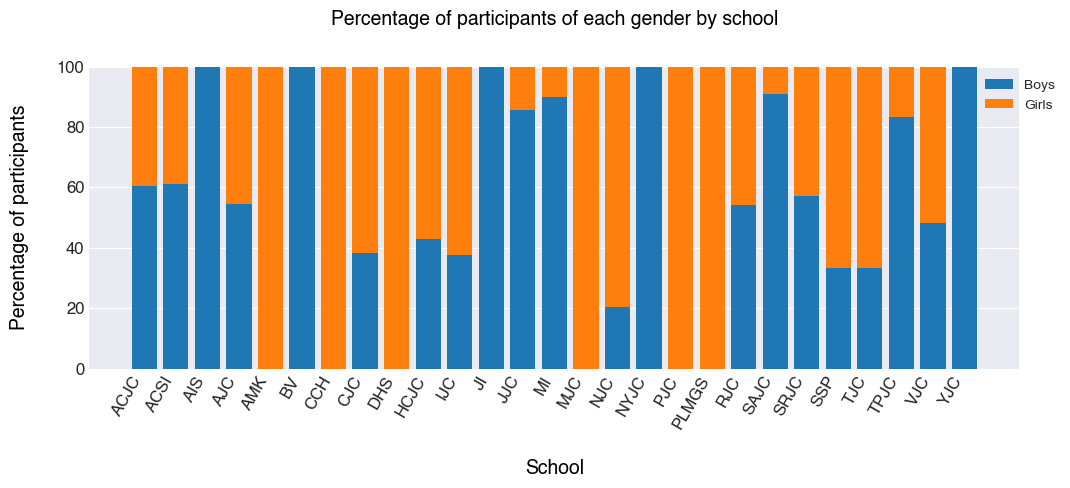

In [14]:
plt.figure(figsize=(12,4), dpi= 100)

# Prepare data
boys, girls = get_boys_girls()

boys_percent = np.array(boys)/(np.array(boys)+np.array(girls)) * 100
girls_percent = np.array(girls)/(np.array(boys)+np.array(girls)) * 100

# Plot graphs
plt.bar(school_names, boys_percent) 
plt.bar(school_names, girls_percent, bottom=boys_percent)

# Decorations
plt.title(label='Percentage of participants of each gender by school', fontdict=font, loc='center', pad=30)
plt.yticks(fontsize=12, fontname='Helvetica')
plt.xticks(fontsize=12, fontname='Helvetica', rotation=60, horizontalalignment= 'right')
plt.xlabel('School', fontdict=font, labelpad = 20)
plt.ylabel('Percentage of participants', fontdict=font, labelpad = 20)
plt.legend(('Boys', 'Girls'), bbox_to_anchor = [0.95, 1])

# show plot
plt.show()

### Stacked Column

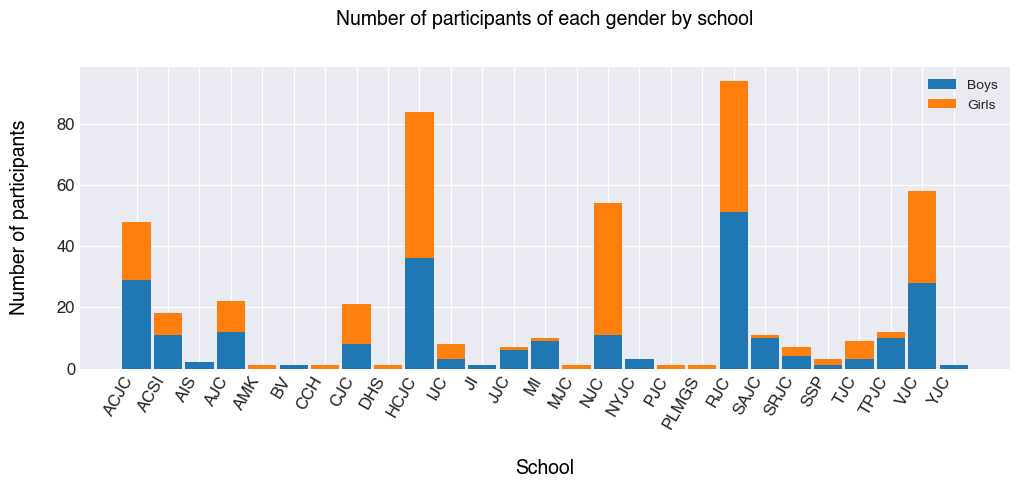

In [15]:
plt.figure(figsize=(12,4), dpi= 100)

# Custom cofig
N = len(school_names) 
ind = np.arange(N)    # the x locations for the groups
width = 0.9     # the width of the bars: can also be len(x) sequence

# Prepare data
boys, girls = get_boys_girls()
p1 = plt.bar(ind, boys, width) 
p2 = plt.bar(ind, girls, width, bottom=boys) 

# Decorations
plt.title(label='Number of participants of each gender by school', fontdict=font, loc='center', pad=30)
plt.yticks(fontsize=12, fontname='Helvetica')
plt.xticks(ind, school_names, fontsize=12, fontname='Helvetica', rotation=60, horizontalalignment= 'right')
plt.xlabel('School', fontdict=font, labelpad = 20)
plt.ylabel('Number of participants', fontdict=font, labelpad = 20)
plt.legend((p1[0], p2[0]), ('Boys', 'Girls'))

# Show plot
plt.show()

## Over Time

### Area Chart

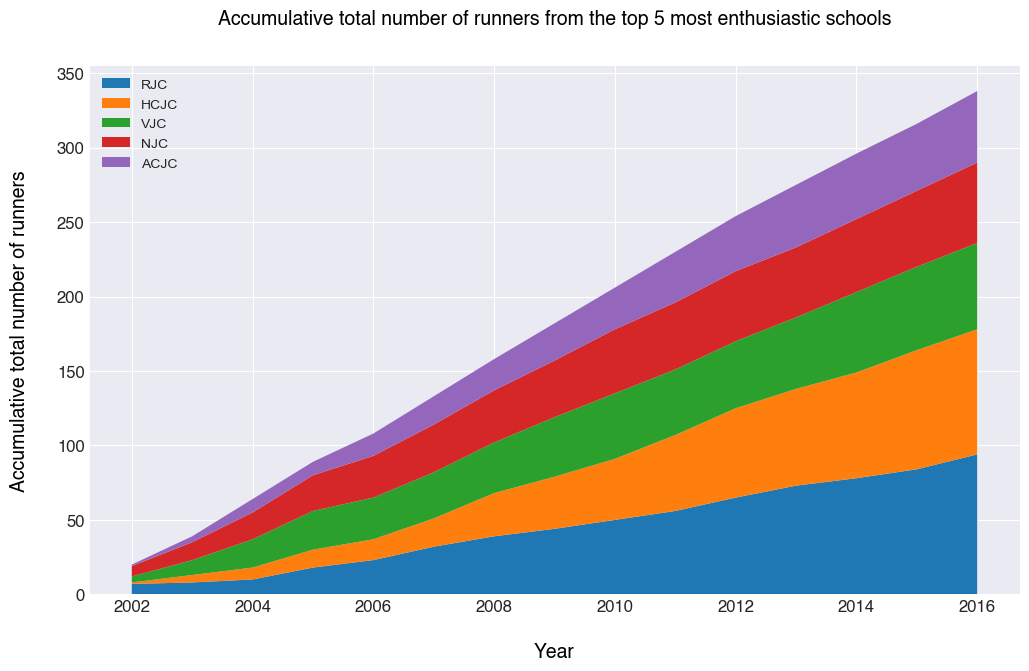

In [16]:
plt.figure(figsize=(12,7), dpi= 100)

# Prepare data
# Find schools with most runners
enthu_school_names = np.array(raw_data.groupby('School', as_index = False)['Name'].count().sort_values(ascending = False, by = 'Name').head(5)['School'])

# Get total number of runners in each school for each year
results = []

for school in enthu_school_names:
    total_runners_over_years = []
    school_data = raw_data[(raw_data['School'] == school)]
    total_tab = 0
    for year in years:
        runners_in_year = school_data[school_data['Year'] == year]['Name'].count()
        total_tab = total_tab + runners_in_year
        total_runners_over_years.append(total_tab)
    results.append(total_runners_over_years)

# Plot
plt.stackplot(years, results, labels = enthu_school_names)

# Decorations
plt.title(label='Accumulative total number of runners from the top 5 most enthusiastic schools', fontdict=font, loc='center', pad=30)
plt.yticks(fontsize=12, fontname='Helvetica')
plt.xticks(fontsize=12, fontname='Helvetica')
plt.xlabel('Year', fontdict=font, labelpad = 20)
plt.ylabel('Accumulative total number of runners', fontdict=font, labelpad = 20)
plt.legend(loc='upper left')

# Show plot
plt.show()